In [105]:
'''
Importing the necessary libraries and modules.
The dataset file is located in a local directory
'''

'''
Importing libraries and loading dataset
should be hosted in different cells for 
the sake of convenience.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import random


In [ ]:
## Load dataset from local directory
file_path = '../ESS2e03_6.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.describe()

C:\Users\KIEN\AppData\Local\Temp\ipykernel_24164\440477471.py:15: DtypeWarning: Columns (165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


,essround,edition,idno,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,...,inwtm,spltadma,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight
count,47537.0,4.753700e+04,4.753700e+04,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,45731.000000,...,45976.000000,45870.000000,42975.000000,47283.000000,44460.000000,44463.000000,45961.000000,47537.000000,47537.000000,47537.000000
mean,2.0,3.600000e+00,1.685002e+07,4.557019,4.236174,3.485159,15.662389,1.691840,18.247155,3.056854,...,70.972159,2.772967,4.488517,2.404860,17.078183,9.575557,2123.904898,0.999996,1.000244,0.901039
std,0.0,8.881878e-16,9.046804e+07,5.063879,12.342261,6.229513,26.960368,4.976275,28.779322,5.546247,...,32.016200,1.630524,2.294224,2.250947,14.457675,13.707262,970.095609,0.473325,0.558686,0.964409
min,2.0,3.600000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2004.000000,0.001600,0.001502,0.022428
25%,2.0,3.600000e+00,1.459000e+03,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,54.000000,1.000000,1.000000,1.000000,8.000000,2.000000,2004.000000,0.835500,0.661499,0.286165
50%,2.0,3.600000e+00,3.706000e+03,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,65.000000,2.000000,6.000000,1.000000,15.000000,10.000000,2004.000000,1.000000,0.919958,0.378749
75%,2.0,3.600000e+00,4.788500e+04,6.000000,2.000000,6.000000,5.000000,2.000000,66.000000,6.000000,...,81.000000,4.000000,6.000000,6.000000,23.000000,11.000000,2005.000000,1.055600,1.194815,1.991918
max,2.0,3.600000e+00,9.214130e+08,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,859.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9999.000000,5.983300,6.274307,2.754824


In [ ]:
## Wanted to see which variables are correlated with health most
correlation = df.corr(numeric_only=True)['health']

In [102]:
## Filter out correlations that is significant with health

print("Top 5 strongest positive correlation to health, according to the dataset:\n",
      correlation.sort_values(ascending=False).head(6))

print()
print("Top 5 strongest negative correlation to health, according to the dataset:\n",
      correlation.sort_values(ascending=True).head(5))


Top 5 strongest positive correlation to health, according to the dataset:
 health     1.000000
actvgrs    0.394656
tmcnsdc    0.360070
gdsprt     0.358119
rtrd       0.338638
lfintr     0.301511
Name: health, dtype: float64

Top 5 strongest negative correlation to health, according to the dataset:
 hlthhmp   -0.416722
rtryr     -0.280256
wntrtr    -0.279271
clhwkrc   -0.267854
pdjobev   -0.262884
Name: health, dtype: float64


In [ ]:
## Using another method to detect correlations with health
correlation2 = df.corr(method = 'pearson', numeric_only=True)['health']

In [ ]:
## Filter out the top 10, positive and negative
print("Top 5 strongest positive correlation to health, according to the dataset:\n",
      correlation2.sort_values(ascending=False).head(6))

print()
print("Top 5 strongest negative correlation to health, according to the dataset:\n",
      correlation2.sort_values(ascending=True).head(5))

Top 5 strongest positive correlation to health, according to the dataset:
 health     1.000000
actvgrs    0.394656
tmcnsdc    0.360070
gdsprt     0.358119
rtrd       0.338638
lfintr     0.301511
Name: health, dtype: float64

Top 5 strongest negative correlation to health, according to the dataset:
 hlthhmp   -0.416722
rtryr     -0.280256
wntrtr    -0.279271
clhwkrc   -0.267854
pdjobev   -0.262884
Name: health, dtype: float64


In [101]:
## The selected columns would contribute to the analysis of the dataset.

print("Top 10 strongest positive correlation to health, both methods:")
print(correlation.sort_values(ascending=False).head(10).index.tolist())
print(correlation2.sort_values(ascending=False).head(10).index.tolist())
## Although the two methods are different, they yield similar results.

pos_correlation = correlation.sort_values(ascending=False).head(10).index.tolist()

print()
print("Top 10 strongest negative correlation to health, both methods:")
print(correlation2.sort_values(ascending=True).head(10).index.tolist())
print(correlation.sort_values(ascending=True).head(10).index.tolist())

neg_correlation = correlation2.sort_values(ascending=True).head(10).index.tolist()

## The selected columns would contribute to the analysis of the dataset.
selected_columns = pos_correlation + neg_correlation

## Analysis dataframe
filtered_df = df[selected_columns]

filtered_df.describe()

Top 10 strongest positive correlation to health, both methods:
['health', 'actvgrs', 'tmcnsdc', 'gdsprt', 'rtrd', 'lfintr', 'clmrlx', 'frshrst', 'icmnac', 'plnchld']
['health', 'actvgrs', 'tmcnsdc', 'gdsprt', 'rtrd', 'lfintr', 'clmrlx', 'frshrst', 'icmnac', 'plnchld']

Top 10 strongest negative correlation to health, both methods:
['hlthhmp', 'rtryr', 'wntrtr', 'clhwkrc', 'pdjobev', 'clfncrc', 'pdwrk', 'cldnhhn', 'usmdprs', 'edlvie']
['hlthhmp', 'rtryr', 'wntrtr', 'clhwkrc', 'pdjobev', 'clfncrc', 'pdwrk', 'cldnhhn', 'usmdprs', 'edlvie']


,health,actvgrs,tmcnsdc,gdsprt,rtrd,lfintr,clmrlx,frshrst,icmnac,plnchld,hlthhmp,rtryr,wntrtr,clhwkrc,pdjobev,clfncrc,pdwrk,cldnhhn,usmdprs,edlvie
count,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,47537.000000,2286.000000
mean,2.249637,3.017166,2.627658,2.794876,0.244504,2.925300,2.977449,3.255380,2.198225,4.108042,2.717315,5699.928140,5.039401,4.789848,3.730883,4.836149,0.497739,41.645161,1.619181,3.786089
std,0.960804,1.395300,1.337249,1.282396,0.429797,1.431319,1.330485,1.497036,1.335451,2.349112,0.709057,2007.813161,1.986783,1.668850,2.414196,1.594142,0.500000,31.138822,0.638952,1.484331
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,6666.000000,6.000000,3.000000,1.000000,3.000000,0.000000,2.000000,1.000000,3.000000
50%,2.000000,3.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,2.000000,6.000000,3.000000,6666.000000,6.000000,6.000000,6.000000,6.000000,0.000000,66.000000,2.000000,4.000000
75%,3.000000,4.000000,3.000000,3.000000,0.000000,4.000000,4.000000,4.000000,3.000000,6.000000,3.000000,6666.000000,6.000000,6.000000,6.000000,6.000000,1.000000,66.000000,2.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9.000000,9.000000,9.000000,9.000000,1.000000,99.000000,9.000000,7.000000


Text(0.5, 1.0, 'Overall subjective health status of Europe')

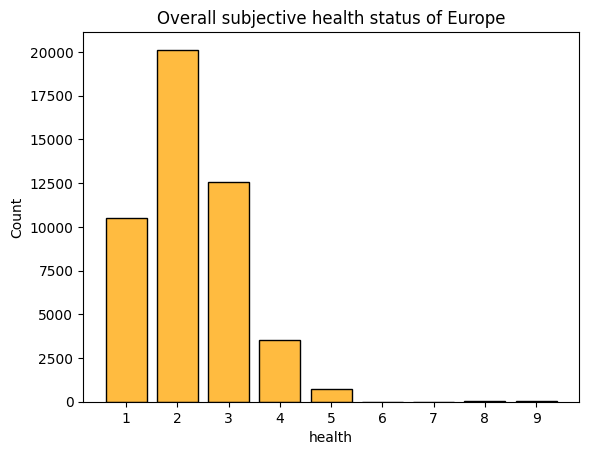

In [ ]:
## Overall health status of Europe

sns.histplot(filtered_df['health'], color='orange',
             shrink=0.8, discrete = True)
plt.xticks(range(1, 10))
plt.title('Overall subjective health status of Europe')

'''
Although the rating is subjective (each person has a different
subjective viewpoint), the overall health status of Europe is concentrated
around 1-3, which is, in general, not very good.
'''